In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from scipy import stats
from scipy.optimize import curve_fit

tau = 2.0 * math.pi

In [7]:
#with open('../Tutorials/data/hygfull.csv') as f:
#    print f.read(250) + '...'

In [9]:
import csv
with open('../Tutorials/data/hygfull.csv') as f:
    stars = list(csv.DictReader(f))

print ('The database holds', len(stars), 'stars')
print ('An example star:', stars[123])

The database holds 87475 stars
An example star: OrderedDict([('StarID', '124'), ('Hip', '166'), ('HD', '224965'), ('HR', ''), ('Gliese', ''), ('BayerFlamsteed', ''), ('ProperName', ''), ('RA', '0.03476844'), ('Dec', '-56.51490157'), ('Distance', '105.708245243129'), ('Mag', '8.86'), ('AbsMag', '3.73945568200896'), ('Spectrum', 'G3V'), ('ColorIndex', '0.660')])


In [11]:
from spectral_classification import build_color_chart
color_chart = build_color_chart('starcolors.txt')

print ('The RGB color for class G2(V) is:\n',)
print (color_chart['G2(V)'])

The RGB color for class G2(V) is:

[1.         0.96078431 0.94901961]


In [12]:
usefuls = [
    star for star in stars
    if star['Spectrum'] in color_chart and
       star['ColorIndex'] != ''
    ]

print ('There are', len(usefuls), '/', len(stars), 'useful stars')
print ('Which is', 100.0 * float(len(usefuls)) / len(stars), '%')

There are 65651 / 87475 useful stars
Which is 75.05115747356388 %


In [13]:
color_index = np.array(
    [ float(star['ColorIndex']) for star in usefuls ])
spectral_code = np.array(
    [ star['Spectrum'] for star in usefuls ])

print ('First few spectral codes:', spectral_code[:5])
print ('First few color indexes:', color_index[:5])

First few spectral codes: ['K3V' 'B9' 'F0V' 'G8III' 'G5']
First few color indexes: [ 0.999 -0.019  0.37   0.902  1.067]


In [14]:
rgb_color = np.array(
    [ color_chart[code] for code in spectral_code ])

print ('First few RGB colors:\n', rgb_color[:5])

First few RGB colors:
 [[1.         0.87058824 0.76470588]
 [0.70980392 0.77647059 1.        ]
 [0.87843137 0.89803922 1.        ]
 [1.         0.90588235 0.78039216]
 [1.         0.95686275 0.91764706]]


In [15]:
red = rgb_color[:,0]
green = rgb_color[:,1]
blue = rgb_color[:,2]

big = (8.0, 16.0)

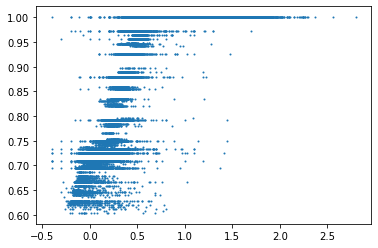

In [16]:
scatter(color_index, red, s=1.0)

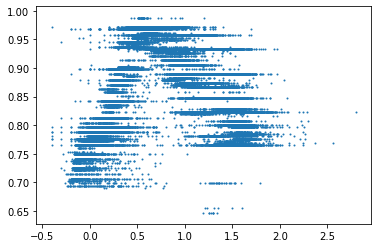

In [17]:
scatter(color_index, green, s=1.0)

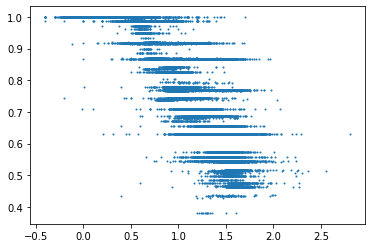

In [18]:
scatter(color_index, blue, s=1.0)

In [20]:
result = stats.linregress(color_index, red)
slope, intercept, r_value, p_value, std_err = result

print (slope, intercept, r_value, p_value, std_err)

0.1881844632650353 0.7820125847945709 0.794997908672443 0.0 0.0005604215670886553


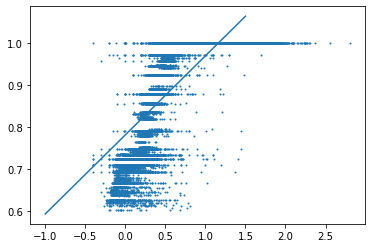

In [21]:
scatter(color_index, red, s=1.0)
x0, x1 = -1, 1.5
plot([x0, x1], [intercept + x0 * slope,
                intercept + x1 * slope])

In [23]:
def fancy_regression(color):
    result = stats.linregress(color_index[color < 1.0],
                              color[color < 1.0])
    slope, intercept, r_value, p_value, std_err = result

    print (slope, intercept, r_value, p_value, std_err)

    scatter(color_index, color, s=1.0)
    x0, x1 = axis()[:2]
    plot([x0, x1], [intercept + x0 * slope,
                    intercept + x1 * slope])
    axis([None, None, 0.3, 1.1])

0.4488342530801349 0.6976888121046197 0.847887169671135 0.0 0.0017142287457597763


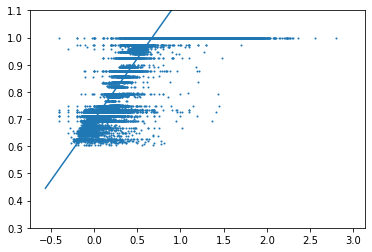

In [24]:
fancy_regression(red)

-0.3495572699482214 1.1700049770147054 -0.8182802914705344 0.0 0.0012459232686304136


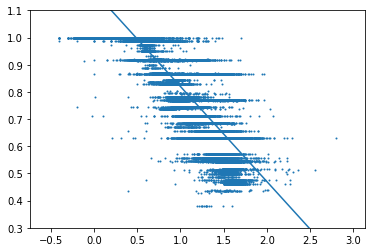

In [25]:
fancy_regression(blue)

In [27]:
def func(x, a, b, c):
    return a * exp(-b*x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))
popt, pcov = curve_fit(func, x, yn)
print (popt)
print (pcov)

[2.36921566 1.27944509 0.54646338]
[[ 0.01525104  0.00640871 -0.00086832]
 [ 0.00640871  0.02139084  0.00602595]
 [-0.00086832  0.00602595  0.00311174]]


In [29]:
def parabola(x, a, b, c):
    return a*x*x + b*x + c

popt, pcov = curve_fit(parabola, color_index, green)
print (popt)
print (pcov)

[-0.22906088  0.38220694  0.77957636]
[[ 4.96949019e-07 -7.59683731e-07  1.64263987e-07]
 [-7.59683731e-07  1.27704748e-06 -3.35845831e-07]
 [ 1.64263987e-07 -3.35845831e-07  1.45581050e-07]]


[None, None, 0.6, 1.1]

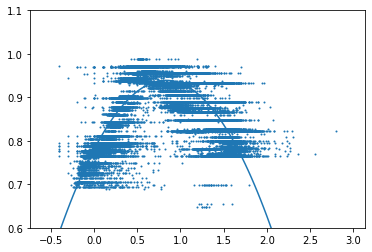

In [30]:
scatter(color_index, green, s=1.0)
x0, x1, y0, y1 = axis()
xspace = np.linspace(x0, x1, 100)
yvalue = parabola(xspace, popt[0], popt[1], popt[2])
plot(xspace, yvalue)
axis([None, None, 0.6, 1.1])

In [31]:
def indexed_color(color_index):
    x = color_index
    r =  0.448834253080 * x + 0.697688812105
    g = -0.22906088 * x * x + 0.38220694 * x + 0.77957636
    b = -0.349557269948 * x + 1.170004977010
    return np.array((r, g, b)).clip(0.0, 1.0)

print (indexed_color(0.0))
print (indexed_color(1.0))
print (indexed_color(2.0))

[0.69768881 0.77957636 1.        ]
[1.         0.93272242 0.82044771]
[1.         0.62774672 0.47089044]


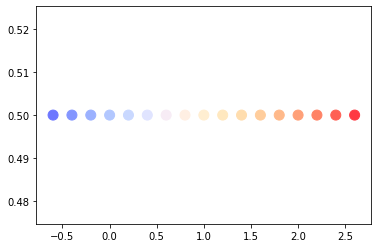

In [32]:
xspace = np.linspace(-1.0, 3.0, 21)[2:-2]
colors = indexed_color(xspace).transpose()
scatter(xspace, xspace * 0.0 + 0.5,
        s=100.0, c=colors)